In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import random
import scipy.stats as ss

In [ ]:
def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    for i in range(1, n + 1):
        # Randomly select either a value from a normal distribution with mean 0 and std. dev 1
        step = random.normal(loc=0, scale=1)
        
        # Move the object up or down by step value
        y += step
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions

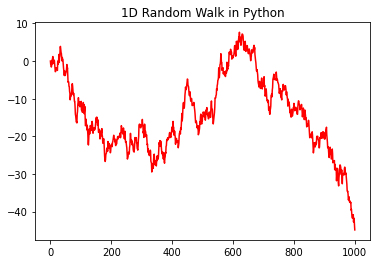

In [ ]:
time_data, pos_data = randomwalk1D(1000)
data1 = pd.DataFrame({'time_data', 'pos_data'})
plt.plot(time_data, pos_data, 'r-')
plt.title("1D Random Walk in Python")
plt.show()

In [ ]:
data1 = pd.DataFrame(
    {'time': time_data,
     'position': pos_data
    })

In [ ]:
data1

,time,position
0,0,0.000000
1,1,-0.949950
2,2,-1.037468
3,3,-1.587337
4,4,-1.209407
...,...,...
996,996,-42.764844
997,997,-41.726962
998,998,-42.147481
999,999,-43.720006


In [ ]:
data1.corr(method='pearson')

,time,position
time,1.000000,-0.145642
position,-0.145642,1.000000


In [ ]:
data1.corr(method='spearman')

,time,position
time,1.000000,-0.101912
position,-0.101912,1.000000


In [ ]:
#import statsmodels.api as sm
#sm.stats.acorr_ljungbox(pos_data, boxpierce=True)

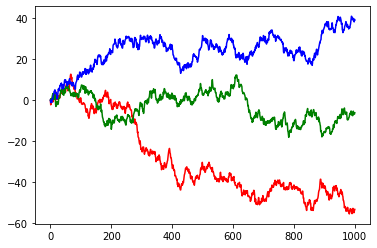

In [ ]:
rw1 = randomwalk1D(1000)
rw2 = randomwalk1D(1000)
rw3 = randomwalk1D(1000)
plt.plot(rw1[0], rw1[1], 'r-', label="rw1")
plt.plot(rw2[0], rw2[1], 'g-', label="rw2")
plt.plot(rw3[0], rw3[1], 'b-', label="rw3")
plt.show()

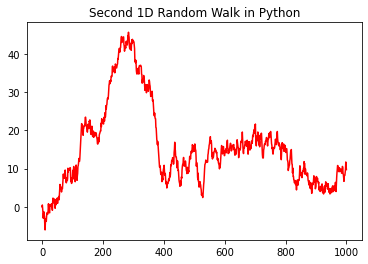

In [ ]:
time_data2, pos_data2 = randomwalk1D(1000)
data2 = pd.DataFrame(
    {'time': time_data2,
     'position': pos_data2
    })
plt.plot(time_data2, pos_data2, 'r-')
plt.title("Second 1D Random Walk in Python")
plt.show()

In [ ]:
data2.corr(method='pearson')

,time,position
time,1.00000,-0.25615
position,-0.25615,1.00000


In [ ]:
data2.corr(method='spearman')

,time,position
time,1.000000,-0.217605
position,-0.217605,1.000000


In [ ]:
pval_res = ss.spearmanr(time_data, pos_data)
pval_res.pvalue

0.0012433899481196276

In [ ]:
def pval_graph_spearman(n):
  x, y = 0,0
  simulation_s = np.arange(n + 1)
  pval_s = [y]
  for i in range(1, n+1):
    time_data, pos_data = randomwalk1D(1000)
    pval_res = ss.spearmanr(time_data, pos_data)
    y = pval_res.pvalue
    pval_s.append(y)
  return simulation_s, pval_s


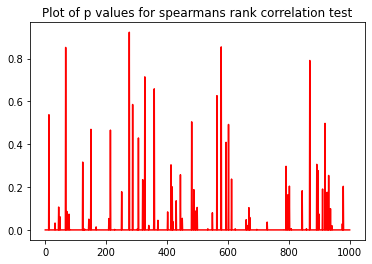

In [ ]:
simulation_s, pval_s = pval_graph_spearman(1000)
plt.plot(simulation_s, pval_s, 'r-')
plt.title("Plot of p values for spearmans rank correlation test")
plt.show()

In [ ]:
pval_s

[0,
 0.0002460411505342802,
 2.566797413931636e-38,
 1.1563024644554284e-25,
 5.2152324830249585e-298,
 0.0,
 9.958276942060571e-204,
 2.215584477533628e-290,
 2.862159892839384e-223,
 0.00010588176740354187,
 3.9120211882391583e-10,
 1.6736230501896375e-303,
 0.5376225777014635,
 1.0826968587434717e-83,
 2.9716213865111327e-233,
 0.0001881678360470997,
 8.100336594384742e-89,
 3.4985249834164146e-278,
 0.0,
 2.824687488285715e-102,
 3.418869635276901e-09,
 0.0,
 0.00015650855783968268,
 1.68964931760409e-293,
 4.1184760236220716e-142,
 0.0,
 1.70325434701903e-18,
 5.627001169127982e-07,
 3.708186372200146e-173,
 5.911371614117425e-237,
 1.398848083057785e-194,
 2.59635804356368e-07,
 0.0320851301201662,
 2.609486099835408e-102,
 2.5481933899165207e-56,
 5.373001972959871e-48,
 3.088422718156189e-190,
 9.76336840585721e-118,
 3.5546394668944145e-129,
 6.175784052125884e-228,
 0.0,
 0.0,
 0.0,
 9.82485818076153e-143,
 0.10665980480964127,
 2.4535283499295095e-11,
 1.822455271230086e-29,

In [ ]:
s_hist = np.histogram(pval_s)

(array([949.,  13.,   5.,   4.,   5.,   4.,   5.,   0.,   1.,   1.,   5.,
          1.,   1.,   1.,   1.,   1.,   0.,   1.,   2.,   1.]),
 array([0.        , 0.04614127, 0.09228254, 0.13842381, 0.18456508,
        0.23070634, 0.27684761, 0.32298888, 0.36913015, 0.41527142,
        0.46141269, 0.50755396, 0.55369523, 0.5998365 , 0.64597776,
        0.69211903, 0.7382603 , 0.78440157, 0.83054284, 0.87668411,
        0.92282538]),
 <a list of 20 Patch objects>)

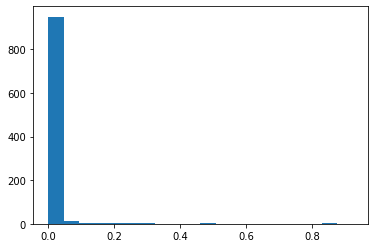

In [ ]:
plt.hist((pval_s), bins = 20)

In [ ]:
np.percentile(pval_s, 5, interpolation = 'nearest')

1.852039864070312e-06

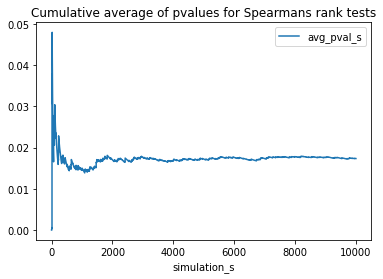

In [ ]:
data_s = pd.DataFrame({'simulation_s':simulation_s, 'pval_s':pval_s})
data_s['avg_pval_s'] = data_s['pval_s'].expanding().mean()
data_s.plot(x='simulation_s', y='avg_pval_s', title = 'Cumulative average of pvalues for Spearmans rank tests')

In [ ]:
data_s.head

<bound method NDFrame.head of       simulation_s         pval_s     avg_pval_s
0                0   0.000000e+00   0.000000e+00
1                1  9.237775e-145  4.618887e-145
2                2  2.144254e-188  3.079258e-145
3                3   1.821384e-06   4.553460e-07
4                4   2.090022e-30   3.642768e-07
...            ...            ...            ...
996            996   1.374266e-19   1.842207e-02
997            997  9.536691e-230   1.840361e-02
998            998   3.063405e-14   1.838519e-02
999            999   3.567686e-04   1.836716e-02
1000          1000   2.823735e-07   1.834881e-02

[1001 rows x 3 columns]>

In [ ]:
def pval_graph_pearson(n):
  x, y = 0,0
  simulation_p = np.arange(n + 1)
  pval_p = [y]
  for i in range(1, n+1):
    time_data, pos_data = randomwalk1D(1000)
    r,p = ss.pearsonr(time_data, pos_data)
    yp = p
    pval_p.append(yp)
  return simulation_p, pval_p


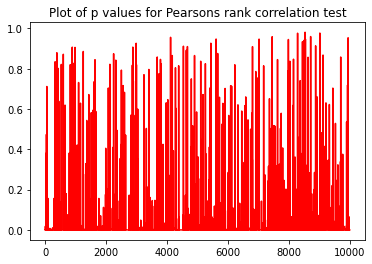

In [ ]:
simulation_p, pval_p = pval_graph_pearson(10000)
plt.plot(simulation_p, pval_p, 'r-')
plt.title("Plot of p values for Pearsons rank correlation test")
plt.show()

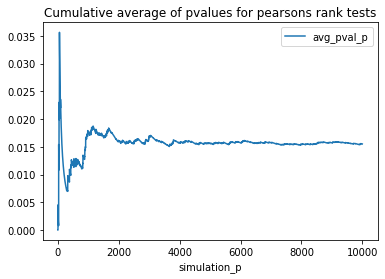

In [ ]:
data_p = pd.DataFrame({'simulation_p':simulation_p, 'pval_p':pval_p})
data_p['avg_pval_p'] = data_p['pval_p'].expanding().mean()
data_p.plot(x='simulation_p', y='avg_pval_p', title = 'Cumulative average of pvalues for pearsons rank tests')

In [ ]:
data_s.head

<bound method NDFrame.head of       simulation_s         pval_s     avg_pval_s
0                0   0.000000e+00   0.000000e+00
1                1  9.237775e-145  4.618887e-145
2                2  2.144254e-188  3.079258e-145
3                3   1.821384e-06   4.553460e-07
4                4   2.090022e-30   3.642768e-07
...            ...            ...            ...
996            996   1.374266e-19   1.842207e-02
997            997  9.536691e-230   1.840361e-02
998            998   3.063405e-14   1.838519e-02
999            999   3.567686e-04   1.836716e-02
1000          1000   2.823735e-07   1.834881e-02

[1001 rows x 3 columns]>

In [ ]:
data_s[data_s > 0.05].count()

simulation_s    1000
pval_s            45
avg_pval_s         0
dtype: int64

In [ ]:
data_s[pval_s > 0.05].count()

In [ ]:
data_p[data_p > 0.05].count()

simulation_p    1000
pval_p            42
avg_pval_p         0
dtype: int64

In [ ]:
data_p[pval_p > 0.05].count()

In [ ]:
def pval_graph_pearson_dif_length(n):
  w_lengths = (3,n)
  xn, yn = 0,0
  w_length_p = np.arange(n + 1)
  avg_pvalp = [yn]
  for i in range(3,n):
    x, y = 0,0
    simulation_p = np.arange(n + 1)
    pval_p = [y]
    for k in range(1, n+1):
      time_data, pos_data = randomwalk1D(n)
      pval_res = ss.pearsonr(time_data, pos_data)
      y = pval_res.pvalue
      pval_p.append(y)
    return simulation_p, pval_p
  yn = pval_p.mean()  
  avg_pvalp.append(yn)
  return w_length_p, avg_pvalp

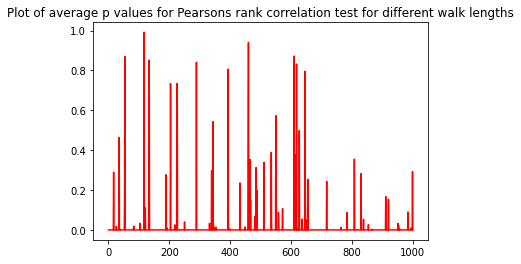

In [ ]:
w_length_p, avg_pvalp = pval_graph_pearson_dif_length(1000)
plt.plot(w_length_p, avg_pvalp, 'r-')
plt.title("Plot of average p values for Pearsons rank correlation test for different walk lengths")
plt.show()

In [ ]:
def pval_graph_spearman_dif_length(n):
  x1, y1 = 0,0
  w_length_s = np.arange(n + 1)
  avg_pvals = [y1]
  for i in range(3,n):
    x, y = 0,0
    simulation_p = np.arange(n + 1)
    pval_s = [y]
    for k in range(1, 101):
      time_data, pos_data = randomwalk1D(i)
      pval_res = ss.spearmanr(time_data, pos_data)
      y = pval_res.pvalue
      pval_s.append(y)
    return simulation_s, pval_s
  y1 = pval_s.mean()  
  avg_pvals.append(y1)
  return w_length_s, avg_pvals

ValueError: ignored

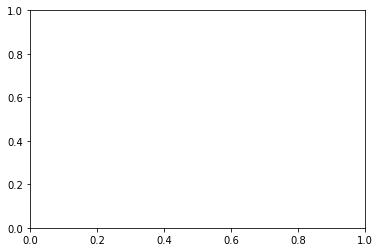

In [ ]:
w_length_s, avg_pvals = pval_graph_spearman_dif_length(100)
plt.plot(w_length_s, avg_pvals, 'r-')
plt.title("Plot of average p values for Spearmans rank correlation test for different walk lengths")
plt.show()

In [ ]:
def pval_graph_pearson1(n,k):
  x, y = 0,0
  simulation_p = np.arange(n + 1)
  pval_p = [y]
  print(n)
  print(k)
  for i in range(1, n+1):
    time_data, pos_data = randomwalk1D(k)
    pval_res1 = ss.spearmanr(time_data, pos_data)
    y = pval_res1.pvalue
    pval_p.append(y)
  return simulation_p, pval_p

In [ ]:
data_p = pd.DataFrame({'simulation_p':simulation_p, 'pval_p':pval_p})
data_p.mean()

simulation_p    500.00000
pval_p            0.19366
dtype: float64

100
100


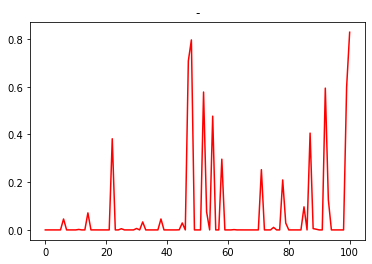

In [ ]:
simulation_p, pval_p = pval_graph_pearson1(100,100)
plt.plot(simulation_p, pval_p, 'r-')
plt.title("-")
plt.show()

In [ ]:
def pval_graph_pearson2(n,k):
  x, y = 0,0
  simulation_p = np.arange(n + 1)
  walk_length = []
  pval_p = [y]
  avg_p = []
  perc_p = []
  count = []
  for p in range(3, k+1):
    pval_p = []
    for i in range(1, n+1):
      time_data, pos_data = randomwalk1D(p)
      pval_res1 = ss.spearmanr(time_data, pos_data)
      y = pval_res1.pvalue
      if y > 0.05:
          count.append(1)
      else:
          count.append(0)
      pval_p.append(y)
      count = count
    walk_length.append(p)
    avgp = np.mean(pval_p)
    perc = np.percentile(pval_p, 95, interpolation = 'nearest')
    avg_p.append(avgp)
    perc_p.append(perc)
    cpwl = np.add.reduceat(count, np.arange(0, len(count), n))
    totalcount = sum(count)
  return walk_length, avg_p, count, totalcount, cpwl, n, k, perc_p

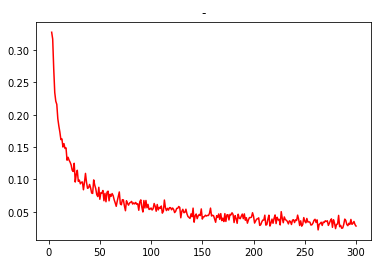

In [ ]:
walk_length, avg_pval, count, totalcount, cpwl, n, k, perc_p = pval_graph_pearson2(1000,300)
plt.plot(walk_length, avg_pval, 'r-')
plt.title("-")
plt.show()
#totalcount

In [ ]:
cpwl

array([750, 675, 663, 652, 552, 510, 496, 445, 430, 375, 428, 371, 356,
       355, 331, 310, 332, 322, 311, 283, 286, 306, 288, 298, 267, 273,
       241, 246, 224, 249, 259, 242, 238, 239, 205, 222, 221, 210, 222,
       210, 205, 226, 190, 186, 212, 196, 197, 196, 183, 201, 182, 180,
       185, 194, 180, 188, 197, 202, 180, 170, 171, 178, 166, 169, 170,
       167, 144, 175, 161, 144, 155, 183, 173, 163, 157, 148, 145, 163,
       145, 133, 153, 138, 138, 157, 158, 149, 136, 154, 151, 154, 141,
       151, 161, 133, 143, 139, 143, 145])

In [ ]:
logc = np.log(cpwl)

In [ ]:
xaxis = range(3,301)
logx = np.log(xaxis)

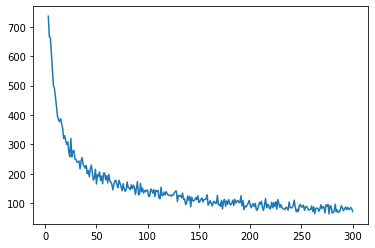

In [ ]:
plt.plot(xaxis, cpwl)

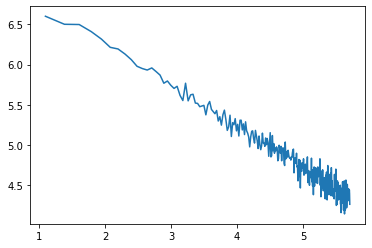

In [ ]:
plt.plot(logx, logc)

In [ ]:
totalcount

23464

In [ ]:
totalcount/(n*k)

0.23464

In [ ]:
count

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
reg_df = pd.DataFrame({'logx':logx, 'logc':logc})
reg_df

,logx,logc
0,1.098612,6.601230
1,1.386294,6.501290
2,1.609438,6.498282
3,1.791759,6.410175
4,1.945910,6.317165
...,...,...
293,5.690359,4.356709
294,5.693732,4.369448
295,5.697093,4.442651
296,5.700444,4.394449


In [ ]:
y = reg_df.logc
X = reg_df[["logx"]]

In [ ]:
lr_model = LinearRegression().fit(X, y)
lr_model

LinearRegression()

In [ ]:
lr_model.coef_

array([-0.51896067])

In [ ]:
lr_model.intercept_

7.305223245906718

In [ ]:
#y = 7.305223245906718 + -0.51896067*X

In [ ]:
log_regy = lr_model.intercept_ + (lr_model.coef_*logx)

<function matplotlib.pyplot.show(*args, **kw)>

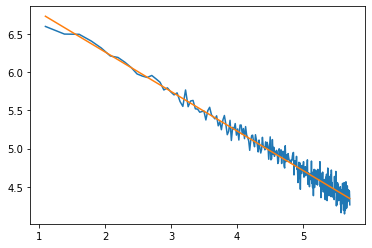

In [ ]:
plt.plot(logx, logc)
plt.plot(logx, log_regy)
plt.show

In [ ]:
regy = np.exp(log_regy)

<function matplotlib.pyplot.show(*args, **kw)>

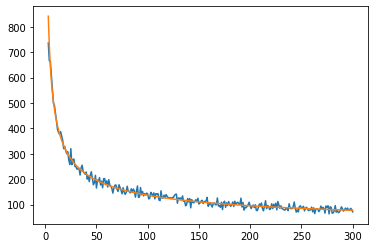

In [ ]:
plt.plot(xaxis, cpwl)
plt.plot(xaxis, regy)
plt.show

In [ ]:
regy

array([841.41640749, 724.72406958, 645.47614952, 587.20297435,
       542.05767205, 505.76637852, 475.77739938, 450.4612835 ,
       428.72251735, 409.79392608, 393.12019171, 378.28817511,
       364.98333173, 352.96141025, 342.02948162, 332.03286929,
       322.84592798, 314.36539999, 306.50553902, 299.19447151,
       292.37144087, 285.98469215, 279.98982847, 274.3485197 ,
       269.02747764, 263.99763495, 259.23348176, 254.7125253 ,
       250.41484657, 246.32273401, 242.42037895, 238.69362082,
       235.12973288, 231.71724094, 228.44576941, 225.30590975,
       222.28910773, 219.38756633, 216.59416174, 213.90237054,
       211.30620619, 208.80016365, 206.37917069, 204.0385452 ,
       201.77395745, 199.58139674, 197.45714188, 195.39773482,
       193.39995729, 191.46080983, 189.57749303, 187.74739077,
       185.96805503, 184.2371923 , 182.55265127, 180.91241172,
       179.31457441, 177.75735193, 176.23906041, 174.75811194,
       173.31300763, 171.90233132, 170.52474383, 169.17

In [ ]:
#y = exp(7.340769199079349 + -0.53050852*X)

In [ ]:
cpwl/1000

array([0.75 , 0.675, 0.663, 0.652, 0.552, 0.51 , 0.496, 0.445, 0.43 ,
       0.375, 0.428, 0.371, 0.356, 0.355, 0.331, 0.31 , 0.332, 0.322,
       0.311, 0.283, 0.286, 0.306, 0.288, 0.298, 0.267, 0.273, 0.241,
       0.246, 0.224, 0.249, 0.259, 0.242, 0.238, 0.239, 0.205, 0.222,
       0.221, 0.21 , 0.222, 0.21 , 0.205, 0.226, 0.19 , 0.186, 0.212,
       0.196, 0.197, 0.196, 0.183, 0.201, 0.182, 0.18 , 0.185, 0.194,
       0.18 , 0.188, 0.197, 0.202, 0.18 , 0.17 , 0.171, 0.178, 0.166,
       0.169, 0.17 , 0.167, 0.144, 0.175, 0.161, 0.144, 0.155, 0.183,
       0.173, 0.163, 0.157, 0.148, 0.145, 0.163, 0.145, 0.133, 0.153,
       0.138, 0.138, 0.157, 0.158, 0.149, 0.136, 0.154, 0.151, 0.154,
       0.141, 0.151, 0.161, 0.133, 0.143, 0.139, 0.143, 0.145])

In [ ]:
walk_length

In [ ]:
perc_p

[0.0,
 1.4042654220543672e-24,
 0.0,
 0.0004541491691941689,
 3.3143960262001043e-05,
 8.762523965086177e-05,
 2.279854920641689e-05,
 1.118303770149319e-05,
 3.9272610809659444e-06,
 1.1239312789557584e-06,
 1.661613698567939e-07,
 7.072303009204256e-09,
 3.3439000100406954e-07,
 4.79175684831834e-09,
 1.5597650189845142e-09,
 6.8716449563255465e-09,
 2.429729310669123e-10,
 2.5176424662475392e-11,
 4.705163796054206e-11,
 2.971868444999934e-11,
 1.0036019675593056e-12,
 1.7503491349414965e-12,
 1.0911485424058796e-12,
 1.388023333541597e-12,
 9.229892876015256e-13,
 6.058263936956089e-13,
 7.273475740758801e-12,
 2.0804107865772793e-15,
 6.468215518572115e-15,
 2.9974254614388077e-17,
 2.8278922381371023e-16,
 4.1431207285510916e-14,
 2.876917119901389e-17,
 1.8909895790022836e-20,
 7.948165312268889e-19,
 9.968085087358393e-18,
 5.580826792635759e-18,
 1.1167513986857655e-19,
 3.3166865980938997e-18,
 5.542264657141657e-19,
 3.829316981314679e-22,
 2.7144484727554327e-20,
 3.4643416

In [ ]:
lp_p = np.log(perc_p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


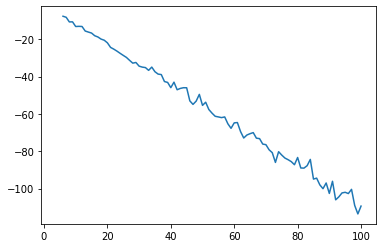

In [ ]:
plt.plot(walk_length, lp_p)

In [ ]:
pr_df = pd.DataFrame({'walk_length':walk_length, 'lp_p':lp_p})
pr_df

,walk_length,lp_p
0,3,-inf
1,4,-54.922528
2,5,-inf
3,6,-7.697085
4,7,-10.314650
...,...,...
93,96,-109.734749
94,97,-101.315255
95,98,-109.308644
96,99,-111.541865


In [ ]:
y_1= pr_df.lp_p
X_1 = pr_df[["walk_length"]]

In [ ]:
lr_model_1 = LinearRegression().fit(X_1, y_1)
lr_model_1

ValueError: ignored

In [ ]:
log_regy_1 = lr_model_1.intercept_ + (lr_model_1.coef_*logx)

In [ ]:
plt.plot(walk_length, lp_p)
plt.plot(walk_length, log_regy_1)
plt.show

In [ ]:
def pval_graph_pearson3(n,k):
  x, y = 0,0
  simulation_p = np.arange(n + 1)
  walk_length = []
  pval_p = [y]
  avg_p = []
  perc_p = []
  count = []
  for p in range(20, k+1):
    pval_p = []
    for i in range(1, n+1):
      time_data, pos_data = randomwalk1D(p)
      pval_res1 = ss.spearmanr(time_data, pos_data)
      y = pval_res1.pvalue
      if y > 0.05:
          count.append(1)
      else:
          count.append(0)
      pval_p.append(y)
      count = count
    walk_length.append(p)
    avgp = np.mean(pval_p)
    perc = np.percentile(pval_p, 5, interpolation = 'nearest')
    avg_p.append(avgp)
    perc_p.append(perc)
    cpwl = np.add.reduceat(count, np.arange(0, len(count), n))
    totalcount = sum(count)
  return walk_length, avg_p, count, totalcount, cpwl, n, k, perc_p

In [ ]:
walk_length3, avg_pval3, count3, totalcount3, cpwl3, n3, k3, perc_p3 = pval_graph_pearson3(1000,300)

In [ ]:
perc_p3

[8.44287328049144e-11,
 5.7084799258788046e-11,
 8.522205691075868e-12,
 1.2143629807472531e-12,
 7.979727229407689e-13,
 4.137480888788617e-13,
 7.985788731245063e-14,
 4.1863870849586334e-14,
 4.9425141901836515e-15,
 1.4895551806856827e-14,
 2.8010718455713633e-15,
 1.2845489971309584e-15,
 4.0511530068103143e-16,
 1.2269076732454394e-17,
 6.474267044574617e-17,
 7.878619769694838e-18,
 4.5332188866824935e-18,
 3.458086909746159e-19,
 3.3604023078964087e-19,
 2.470395302818197e-19,
 2.7413834514555543e-19,
 2.1019581427663353e-20,
 6.256785148908092e-22,
 1.2585131868243102e-21,
 1.954642398628452e-22,
 4.0076718695083685e-22,
 7.138319605948204e-24,
 1.1969593213647693e-22,
 1.671656173167223e-23,
 6.435861809756643e-25,
 2.0173801697270264e-24,
 2.1162685749473152e-24,
 1.327593276517996e-26,
 1.9815549261672013e-26,
 6.21923066352428e-27,
 5.4782806953825896e-27,
 7.258209518388172e-29,
 1.3276743755788119e-27,
 9.261598568431343e-29,
 5.889782355274588e-28,
 1.6345620766862577e-

In [ ]:
lp_p3 = np.log(perc_p3)

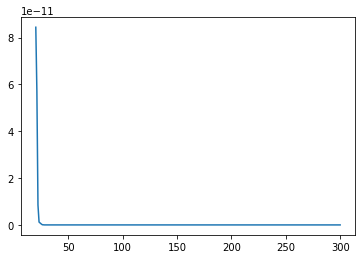

In [ ]:
plt.plot(walk_length3, perc_p3)

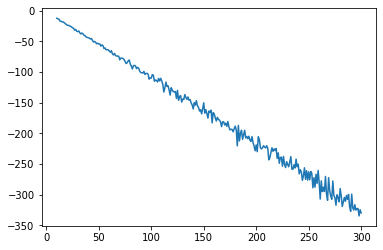

In [ ]:
plt.plot(walk_length3, lp_p3)

In [ ]:
pr3_df = pd.DataFrame({'walk_length3':walk_length3, 'lp_p3':lp_p3})
pr3_df

,walk_length3,lp_p3
0,10,-12.208295
1,11,-13.103333
2,12,-13.698678
3,13,-16.795162
4,14,-17.087671
...,...,...
286,296,-323.179425
287,297,-322.849878
288,298,-334.938901
289,299,-324.817045


In [ ]:
y_3= pr3_df.lp_p3
X_3 = pr3_df[["walk_length3"]]

In [ ]:
lr_model_3 = LinearRegression().fit(X_3, y_3)
lr_model_3

LinearRegression()

In [ ]:
log_regy_3 = lr_model_3.intercept_ + (lr_model_3.coef_*walk_length3)

In [ ]:
lr_model_3.intercept_

-0.4250828036065002

In [ ]:
lr_model_3.coef_

array([-1.08342964])

In [ ]:
#y = -0.4250828036065002 + (-1.08342964*X)

In [ ]:
logWL = np.log(walk_length3)

<function matplotlib.pyplot.show(*args, **kw)>

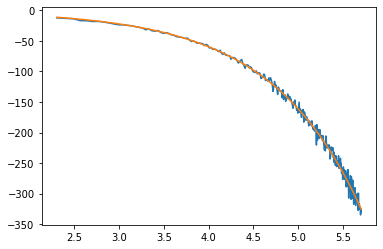

In [ ]:
plt.plot(logWL, lp_p3)
plt.plot(logWL, log_regy_3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

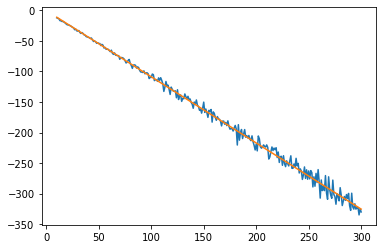

In [ ]:
plt.plot(walk_length3, lp_p3)
plt.plot(walk_length3, log_regy_3)
plt.show

In [ ]:
regy_3 = np.exp(log_regy_3)

<function matplotlib.pyplot.show(*args, **kw)>

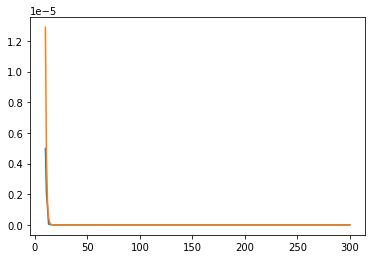

In [ ]:
plt.plot(walk_length3, perc_p3)
plt.plot(walk_length3, regy_3)
plt.show

In [ ]:
#y = exp(-1.1710812144816103 + (-1.07876488*X))